# Exploratory Data Analysis

Language detection

Anggota Kelompok:

2440016804 - Rio Pramana

2440087214 - Debora

2440030323 - Enrico Fernandez

## Install and Import Datasets

In [ ]:
pip install -q datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [ ]:
data = load_dataset('papluca/language-identification', split='train')
data = data.to_pandas()
data.head(5)

Using custom data configuration papluca--language-identification-a3b046ece1478a79
Reusing dataset csv (/root/.cache/huggingface/datasets/papluca___csv/papluca--language-identification-a3b046ece1478a79/0.0.0/51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58)


,labels,text
0,pt,"os chefes de defesa da estónia, letónia, lituâ..."
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,Он увеличил давление .


In [ ]:
data.shape

(70000, 2)

In [ ]:
col_names = data.columns
col_names

Index(['labels', 'text'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  70000 non-null  object
 1   text    70000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,labels,text
count,70000,70000
unique,20,68978
top,pt,Um homem está a tocar guitarra.
freq,3500,18


In [ ]:
#Check missing values
data['labels'].isnull().sum()

0

In [ ]:
data['labels'].unique()

array(['pt', 'bg', 'zh', 'th', 'ru', 'pl', 'ur', 'sw', 'tr', 'es', 'ar',
       'it', 'hi', 'de', 'el', 'nl', 'fr', 'vi', 'en', 'ja'], dtype=object)

In [ ]:
data['labels'].value_counts()

pt    3500
bg    3500
en    3500
vi    3500
fr    3500
nl    3500
el    3500
de    3500
hi    3500
it    3500
ar    3500
es    3500
tr    3500
sw    3500
ur    3500
pl    3500
ru    3500
th    3500
zh    3500
ja    3500
Name: labels, dtype: int64

In [ ]:
data['labels'].value_counts().index

Index(['pt', 'bg', 'en', 'vi', 'fr', 'nl', 'el', 'de', 'hi', 'it', 'ar', 'es',
       'tr', 'sw', 'ur', 'pl', 'ru', 'th', 'zh', 'ja'],
      dtype='object')

In [ ]:
data['labels'].value_counts().index.shape

(20,)

In [ ]:
import re
for labels in data["labels"].value_counts(ascending=False)[:20].index:
    print(labels)
    display(data[data.labels==labels].sample(5))

pt


,labels,text
24522,pt,Um cão castanho senta-se na praia.
62176,pt,Algumas crianças estão a levantar as mãos e a ...
69006,pt,A fraqueza existe na forma como a VBA olha par...
60759,pt,O homem está a comer pizza.
54138,pt,A Amazon também informou que a Procuradoria-Ge...


bg


,labels,text
22761,bg,изобщо не мога да я прочета .
65674,bg,"въпреки добрите местни вина , турците не са го..."
60260,bg,времето и технологичния напредък са минали пре...
34892,bg,тя се отпусна и дишаше дълбоко .
11888,bg,международният олимпийски комитет изгони шести...


en


,labels,text
42654,en,"Very good style, but soso quality."
37315,en,I like how these are flexible and affordable. ...
7591,en,no need to get under the edge of the toilet.
28705,en,She loves it. The fit is perfect and the color...
18056,en,A white duvet cover with a black zipper? Who t...


vi


,labels,text
27298,vi,Phát triển thông tin về các rủi ro an ninh hiệ...
32801,vi,Câu chuyện thư giãn của một người mẹ yêu thươn...
19093,vi,"Vâng , đó là trong những cộng đồng nhỏ đó là m..."
57557,vi,"Bakaly nói không với nhiều câu hỏi tuyết , tất..."
13178,vi,Và nó rất dễ dàng để duy trì điều này mà bạn b...


fr


,labels,text
43389,fr,"Super produit, installation très simple, commu..."
10250,fr,Sans probleme si ce n est la livraison qui a e...
33977,fr,Cette crème atténue vraiment mes boutons d’acn...
53926,fr,Je viens de recevoir cette malette afin de ran...
38538,fr,J'ai commandé la protection pour Galaxy tab A ...


nl


,labels,text
39641,nl,Een meisje in een roze jurk rijdt met haar fie...
43020,nl,Rosenthal daalde commentaar op de Garrett situ...
37125,nl,Tientallen gewonden bij de treinbotsing in Con...
48976,nl,"Singapore aandelen eindigen op 0,37 pct"
15201,nl,"Schoten, Explosies Gehoord als Thais Doorgaan ..."


el


,labels,text
36457,el,Η γυναίκα σου ακούγεται ανώριμη για το μαξ .
17854,el,Ναι είναι ωραία ωραία περιοχή
54273,el,"Υπάρχει μια μαλακό Μόνικα στο εξώφυλλο , και υ..."
30703,el,"Φοβάμαι πως ναι , είπε ο κ. Κάρτερ σοβαρά ."
10076,el,Οι πρακτικές διαχείρισης της ασφάλειας των πλη...


de


,labels,text
15595,de,"Es tut mir leid, so eine schlechte Bewertung ü..."
25843,de,Die Hülle ist ihr Geld wert. Leider steht sie ...
57383,de,der artikel nach über 50 Tagen nicht angekomme...
33917,de,"Sah auf dem Bild gut aus, Zuhause leider gar n..."
51122,de,Die Qualität macht einen guten Eindruck! Leide...


hi


,labels,text
12982,hi,यह श ् री ब ् राउन का अपरिवर ् तनीय वर ् णन है !
42283,hi,क ् या वह खेल है हाँ मुझे लगता है कि यह अब बंद...
46768,hi,"उसने एक भाला हड ़ ताल को बचा लिया , एक और भाला..."
47701,hi,लेकिन एक तरह से मान ् य आलोचना से लाभ प ् राप ...
51163,hi,"अन ् य , अधिक चुनौतीपूर ् ण विकल ् प , जिसके ल..."


it


,labels,text
59689,it,I lavoratori sudcoreani iniziano a lasciare la...
36566,it,Imran a concorso da quattro posti NA
8362,it,"Un attentatore suicida ne uccide otto, ne feri..."
34075,it,Due cani corrono fianco a fianco sull'erba.
38452,it,Una persona sta scrivendo.


ar


,labels,text
45884,ar,( شتاين ) لم يستطع الحصول على اي شيء منه .
54200,ar,اشتري شمعة جديدة او شيء من هذا القبيل ولكن لحس...
4999,ar,"نعم , هذا هو في الواقع موضوع ممل في بطاقات الا..."
24409,ar,"بالعودة الى الش , هناك المزيد من اشجار النخيل ..."
58648,ar,هذا الفيديو الشهير هو ما هو عكس ذلك هنا انا لا...


es


,labels,text
46494,es,Precio calidad está muy bien.
28101,es,Para el precio que tiene encantada la primera ...
68079,es,El acabado está muy bien
6601,es,Aunque el libro se le ve pequeño.. sorprende.....
63744,es,Cumple con las espectativas. Quizás la lámina ...


tr


,labels,text
48999,tr,Verdant Hills ' in bir arka planı olan etkiley...
37826,tr,Yaaa bisiklete bir o yüzden
66157,tr,"Evet , bunu açıklığa gerektiğini lazım . Soda ..."
31979,tr,Yetenekli tedavi dolayı tedavi edilmiş sanırım...
30675,tr,"Ağustos ayında , 4 devre temyiz mahkemesi , bü..."


sw


,labels,text
55924,sw,basi hapo utakuwa wawili wetu .
20513,sw,Mpango wa twenzetumicasatabata ni shirika la k...
53424,sw,Yeah real thick yeah ya ya ya yeah
17195,sw,"Yeye ndani ya hewa kuzunguka kwake , na pumzi ..."
11238,sw,Akiandika katika ukaguzi wa new york wa vitabu...


ur


,labels,text
24287,ur,اٹلی کی سب سے بہتر دلچسبی ، عجائب گھر ، عجائب ...
11220,ur,میں آپ کو تاریخ میں ایک مقام کی ضرورت ہے . '
8262,ur,اوہ ، نہیں ، صاحب .
18276,ur,مرکزی دروازے سے سڑک کا سڑک پر چلتا ہے جو کہ ء ...
34320,ur,وہ ایک مانگنے والا ہے ۔


pl


,labels,text
16955,pl,Mieszane reakcje na małżeństwo NZ osób tej sam...
20641,pl,Zabrano go do szpitala na ostrożne zdjęcia ren...
22577,pl,Ten człowiek gra na drewnianym flecie.
28010,pl,Grupa mężczyzn grających na instrumentach dętych.
51613,pl,"Ale czy naprawdę wierzysz, że w tych wodach by..."


ru


,labels,text
23889,ru,На самом деле я тоже люблю креста .
52259,ru,"Ну , нет никакого быстрого решения или нет уве..."
53124,ru,"Новости отмечают , что Microsoft больше не явл..."
30459,ru,Почему ты так позитивно это знаешь ?
64465,ru,Им нужна новая история о нем .


th


,labels,text
37007,th,ของ สายพันธุ์ สัตว์ 420 ตัว ที่ พบ ใน พื้น...
32854,th,หิว หรอ กระตุ้น พ่อ ของ เขา
7395,th,ดาว เกิด ใหม่ ไม่มี เนื้อหา อีกต่อไป กับ การ เ...
55652,th,แต่ ไม่มี การ ผสมผสาน ที่ มีความสุข ของ การ ว่...
23546,th,Lanais มี การ รับ ชม หัว เพชร จบ จาก ชายหาด ...


zh


,labels,text
55398,zh,这种灯没有想象中的好用，宣传的太离谱。家里室内没有几只蚊子，10只抓到5只就不错了。可能你要...
35137,zh,物超所值啊 正好不喜欢晃眼的颜色 速干透气的 棒棒哒
17198,zh,价格比商场、超市低了30%左右，试用了，目前还可以。而且大过年的前两天，头天下单，第二天中午...
68128,zh,我们这边没还红快递，依然给我送到家，感谢。本来想退货，不退了
46262,zh,看着就不像进口货，里里外外都是中国做工，谁买谁知道，吃起来没半点鱼油的味道，比起之前吃的 ，...


ja


,labels,text
54368,ja,薄い！とにかく薄い！ハッキリ言って吸水力ゼロ。1台拭き上げるのに何回絞ればいいのか…全く洗車...
36744,ja,リモコンがリモコン置き場から落ちやすく、小さいため不便に思いましたが、携帯で電源のon.of...
58012,ja,サイズが小さくて着ることができなくて返品しました。返金はどうなりますか？
31164,ja,フィクセルに取り付けましたが特に問題なくとりつきました。強度も問題なし
2544,ja,私たちの街の犯罪が大幅に増加したため、このカメラを購入しました。 最初は懐疑的でしたが、驚い...


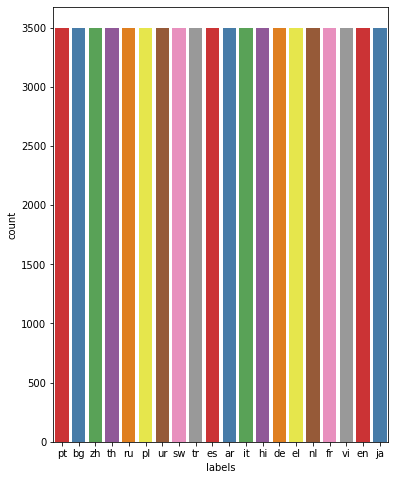

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="labels", data=data, palette="Set1")
plt.show()

Present the number of characters in each sentence/text. This can give us a rough idea about the text length

In [ ]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

data[categorical].head()

There are 2 categorical variables

The categorical variables are : ['labels', 'text']


,labels,text
0,pt,"os chefes de defesa da estónia, letónia, lituâ..."
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,Он увеличил давление .


In [ ]:
data[categorical].isna().sum().to_frame('number of null values')

,number of null values
labels,0
text,0


In [ ]:
# Check for cardinality in categorical variables

for var in categorical:
    print(var, ' contains ', data[var].nunique(), ' labels')

labels  contains  20  labels
text  contains  68978  labels


In [ ]:
def plot_word_number_histogram(text):
    text.str.split().\
      map(lambda x: len(x)).\
      hist(bins = 50)

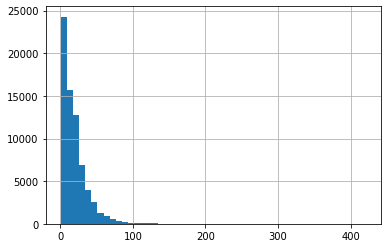

In [ ]:
plot_word_number_histogram(data['text'])

In [ ]:
print(data.text.map(len).min())
print(data.text.map(len).max())

2
2422


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

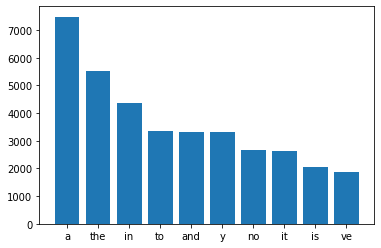

In [ ]:
plot_top_stopwords_barchart(data['text'])

In [ ]:
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter
nltk.download('punkt')

def plot_parts_of_speach_barchart(text):
    nltk.download('averaged_perceptron_tagger')

    def _get_pos(text):
        pos=nltk.pos_tag(word_tokenize(text))
        pos=list(map(list,zip(*pos)))[1]
        return pos
    
    tags=text.apply(lambda x : _get_pos(x))
    tags=[x for l in tags for x in l]
    counter=Counter(tags)
    x,y=list(map(list,zip(*counter.most_common(7))))
    
    sns.barplot(x=y,y=x)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


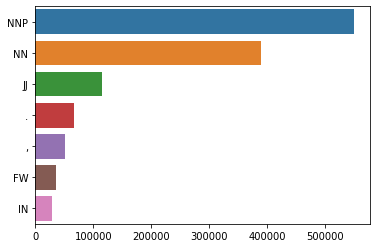

In [ ]:
plot_parts_of_speach_barchart(data['text'])